In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

%matplotlib inline

In [2]:
train_path = '/kaggle/input/brain-tumor/Brain-Tumor-Classification-DataSet-master/Training'
test_path = '/kaggle/input/brain-tumor/Brain-Tumor-Classification-DataSet-master/Testing'

In [3]:
X_train = []
y_train = []
img_size = (300,300)

In [4]:
for folder in os.listdir(train_path):
    print(f"In folder: {folder}")
    for file in os.listdir(os.path.join(train_path,folder)):
        img_path = os.path.join(train_path,folder,file)
        img  = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        X_train.append(img)
        y_train.append(folder)

In folder: no_tumor
In folder: pituitary_tumor
In folder: meningioma_tumor
In folder: glioma_tumor


In [5]:
for folder in os.listdir(test_path):
    print(f"In folder: {folder}")
    for file in os.listdir(os.path.join(test_path,folder)):
        img_path = os.path.join(test_path,folder,file)
        img  = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        X_train.append(img)
        y_train.append(folder)

In folder: no_tumor
In folder: pituitary_tumor
In folder: meningioma_tumor
In folder: glioma_tumor


In [6]:
X_train = np.array(X_train, dtype='float32')

In [7]:
X_train = X_train / 255.0

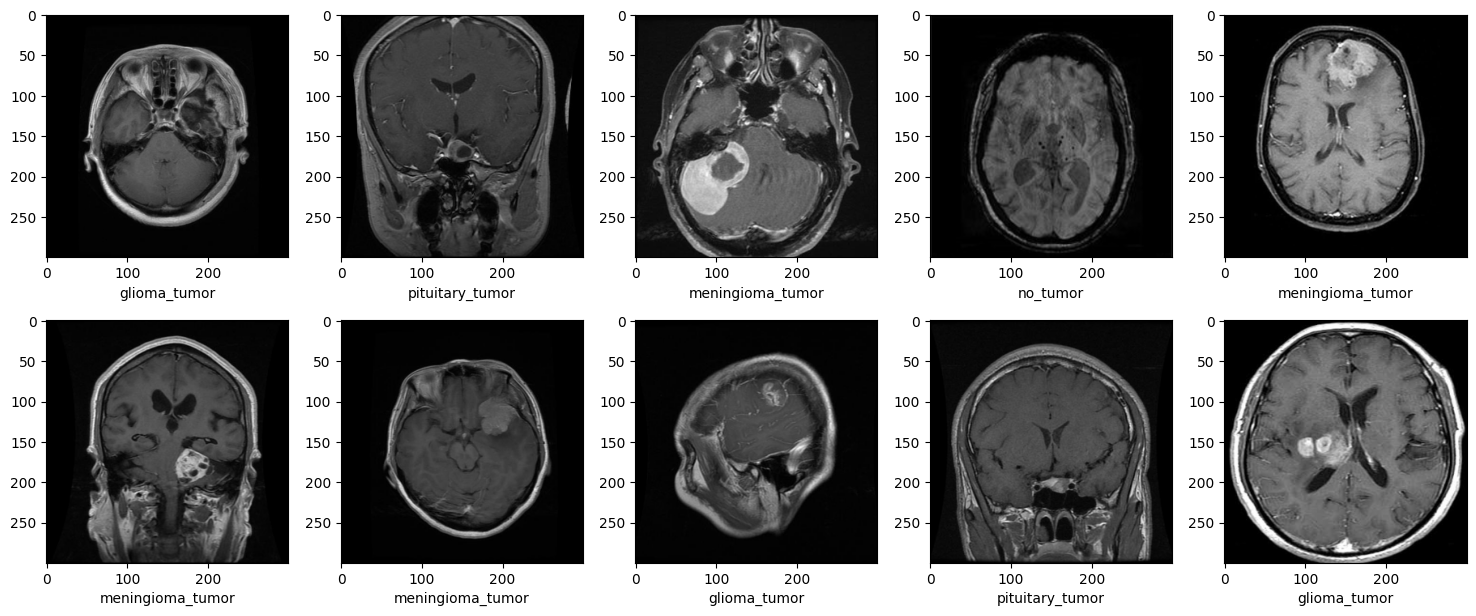

In [8]:
plt.figure(figsize=(15, 15))

random_indices = np.random.choice(len(X_train), size=10, replace=False)
for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.xlabel(y_train[idx])
    plt.tight_layout()
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-04-06 05:52:46.245725: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 05:52:46.245868: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 05:52:46.369378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='nearest')

In [11]:
datagen.fit(X_train)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
# One-Hot Encoding
y_train = np.array(pd.get_dummies(y_train))

In [14]:
#Splitting Data into training, testing and validation
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [15]:
print(f'X_train shape: {(X_train).shape}\n'
      f'y_train shape: {(y_train).shape}\n'
      f'X_test shape: {(X_test).shape}\n'
      f'y_test shape: {(y_test).shape}\n'
      f'X_valid shape: {(X_valid).shape}\n'
      f'y_valid shape: {(y_valid).shape}')

X_train shape: (2643, 300, 300, 3)
y_train shape: (2643, 4)
X_test shape: (327, 300, 300, 3)
y_test shape: (327, 4)
X_valid shape: (294, 300, 300, 3)
y_valid shape: (294, 4)


In [16]:
print(f"Maximum and Minimum pixel value after normalization: {X_train.max()} - {X_train.min()}")

Maximum and Minimum pixel value after normalization: 1.0 - 0.0


In [17]:
input_shape = X_train.shape
print(input_shape)

(2643, 300, 300, 3)


In [18]:
height, width, _ = X_train.shape[1:]
print("Width:", width)
print("Height:", height)

Width: 300
Height: 300


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, AveragePooling2D, Flatten, Dense, Resizing

In [20]:
# Create LeNet-5 model
lenet_model = Sequential([
    # Resizing layer
    Resizing(32, 32, interpolation='bilinear', input_shape=(width, height, 3)),

    # 1st Layer
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid', input_shape=(width, height, 3)),
    BatchNormalization(),
    # 2nd Layer
    AveragePooling2D(pool_size=(2, 2)),

    # 3rd Layer
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
      BatchNormalization(),
    # 4th Layer
    AveragePooling2D(pool_size=(2, 2)),


    Flatten(),

    # 5th Layer
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
lenet_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,584 (240.56 KB)

 Trainable params: 61,540 (240.39 KB)

 Non-trainable params: 44 (176.00 B)

In [22]:
# Compile the model
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = lenet_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
 7/42 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3379 - loss: 1.3939

I0000 00:00:1712382794.621695      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 225ms/step - accuracy: 0.5080 - loss: 1.1086 - val_accuracy: 0.4762 - val_loss: 1.3323
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7559 - loss: 0.6239 - val_accuracy: 0.3946 - val_loss: 1.3724
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8428 - loss: 0.4467 - val_accuracy: 0.3741 - val_loss: 1.5442
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8889 - loss: 0.3347 - val_accuracy: 0.4014 - val_loss: 1.7813
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9134 - loss: 0.2531 - val_accuracy: 0.4082 - val_loss: 2.1030
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9448 - loss: 0.1755 - val_accuracy: 0.3503 - val_loss: 2.5384
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9603 - loss: 0.1474 - val_accuracy: 0.4082 - val_loss: 2.2698
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9741 - loss: 0.1041 - val_accuracy: 0.4422 - val_loss: 

In [24]:
from sklearn.metrics import recall_score

y_test_labels = np.argmax(y_test, axis=1)

# Make predictions on the test dataset
y_pred = lenet_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate recall score
recall = recall_score(y_test_labels, y_pred_classes, average='weighted')

# Print the recall score
print('Recall Score:', recall)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Recall Score: 0.9113149847094801


In [25]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = lenet_model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9184 - loss: 0.3037
Test Accuracy: 0.9113149642944336


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        79
           1       0.89      0.82      0.86        90
           2       0.93      0.92      0.92        73
           3       0.98      0.99      0.98        85

    accuracy                           0.91       327
   macro avg       0.91      0.91      0.91       327
weighted avg       0.91      0.91      0.91       327



In [27]:
class_names = []
for folder in os.listdir(train_path):
    class_names.append(folder)

class_names

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']

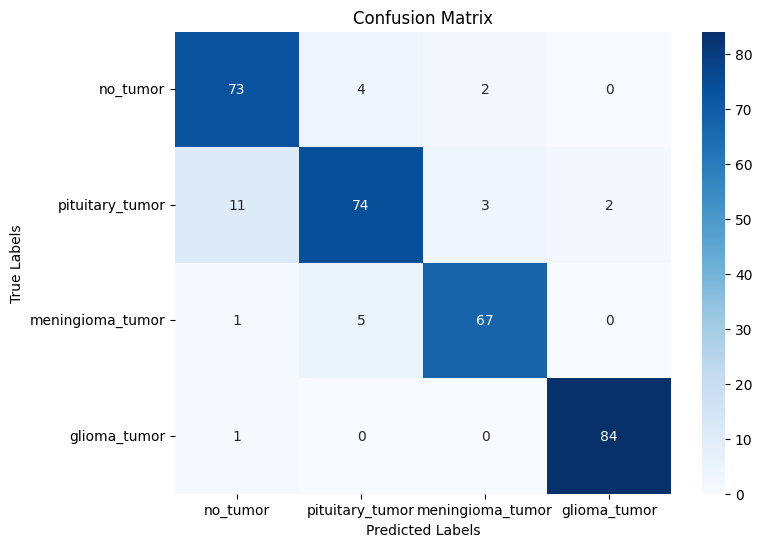

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Resizing

In [30]:
alexnet_model = Sequential([
            # Resizing
            Resizing(227,227, interpolation='bilinear', input_shape=(width,height,3)),
    
            #1st Convolutional Layer
            Conv2D(filters=96,kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
            
            #2nd Convolutional Layer
            Conv2D(filters=256,kernel_size=(5,5), strides=(1,1), padding='same', activation='relu' ),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                #3rd Convolutional Layer
            Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),
                
            #4th Convolutional Layer
            Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),        
            
            #4th Convolutional Layer
            Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                     
            Flatten(),
                      Dense(4096, activation='relu'),
            Dropout(0.5),
            
            Dense(4096, activation='relu'),
            Dropout(0.5),
                     
            Dense(4, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [31]:
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = lenet_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9995 - loss: 0.0045 - val_accuracy: 0.8878 - val_loss: 0.4350
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9995 - loss: 0.0042 - val_accuracy: 0.8878 - val_loss: 0.4283
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9997 - loss: 0.0048 - val_accuracy: 0.8912 - val_loss: 0.4862
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9984 - loss: 0.0058 - val_accuracy: 0.8980 - val_loss: 0.4729
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9993 - loss: 0.0059 - val_accuracy: 0.9014 - val_loss: 0.4210
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9990 - loss: 0.0057 - val_accuracy: 0.8946 - val_loss: 0.4176
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9997 - loss: 0.0027 - val_accuracy: 0.9014 - val_loss: 0.4220
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.8810 - v

In [33]:
test_loss, test_accuracy = lenet_model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7106 - loss: 1.3128
Test Accuracy: 0.6911314725875854


In [34]:
y_test_labels = np.argmax(y_test, axis=1)

# Make predictions on the test dataset
y_pred = lenet_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate recall score
recall = recall_score(y_test_labels, y_pred_classes, average='weighted')

# Print the recall score
print('Recall Score:', recall)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Recall Score: 0.691131498470948


In [35]:
print(classification_report(y_test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.56      0.97      0.71        79
           1       0.56      0.53      0.55        90
           2       1.00      0.60      0.75        73
           3       0.95      0.67      0.79        85

    accuracy                           0.69       327
   macro avg       0.77      0.70      0.70       327
weighted avg       0.76      0.69      0.69       327



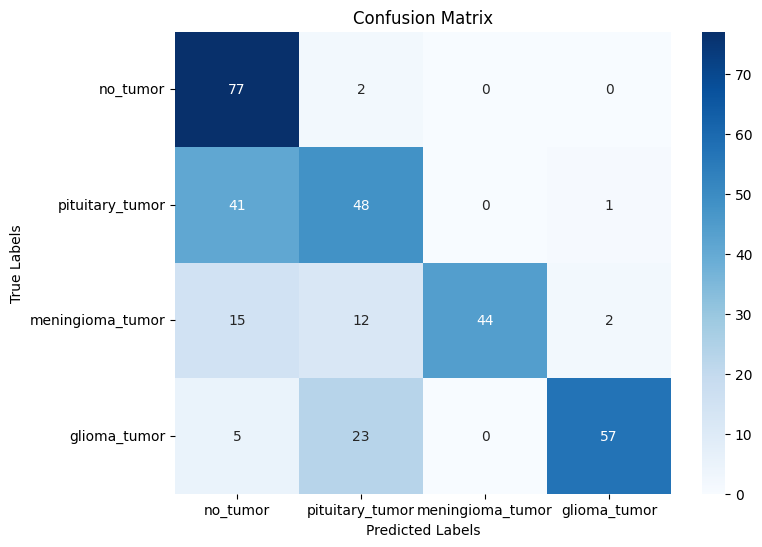

In [36]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Save LeNet-5 model
lenet_model.save('lenet_model.h5')

# Save AlexNet model
alexnet_model.save('alexnet_model.h5')

print("Models saved successfully.")


Models saved successfully.
